In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.DataFrame({
 'x':[12,20,28,18,30,34,56,78,13,34,54,90,8,1,4,7],
 'y':[49,20,34,5,2,6,7,10,35,12,45,79,97,47,8,76]
})

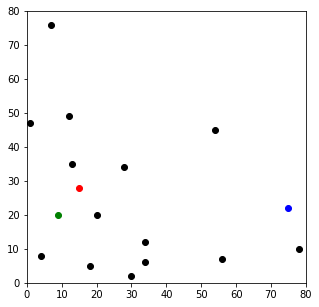

In [14]:
np.random.seed(20)
k =3
# pick random 3 points each time
centroids = {
    i+1: [np.random.randint(0,80), np.random.randint(0,80)] for i in range(k)
}

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.show()

In [15]:
# Assignment stage

def assignment(df, centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['x'] - centroids[i][0])**2
                +(df['y'] - centroids[i][1])**2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # what does this mean?
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    #
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    #
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df
    


In [16]:
df = assignment(df, centroids)

In [17]:
df.head()

,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,49,21.213203,29.154759,68.541958,1,r
1,20,20,9.433981,11.000000,55.036352,1,r
2,28,34,14.317821,23.600847,48.507731,1,r
3,18,5,23.194827,17.492856,59.481089,2,g
4,30,2,30.016662,27.658633,49.244289,2,g


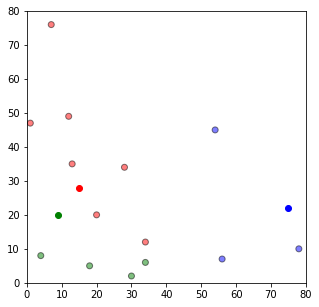

In [18]:
fig = plt.figure(figsize=(5,5))
# what is alpha and edgecolor?
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    # what is * mean here?
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

In [19]:
# Update Stage
import copy
# what is deepcopy?
old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df['closest']==i]['x'])
        centroids[i][1] = np.mean(df[df['closest']==i]['y'])
    return k



In [23]:
centroids = update(centroids)
centroids

{1: [15.375, 46.25], 2: [21.5, 5.25], 3: [69.5, 35.25]}

In [24]:
centroids = update(centroids)
centroids

{1: [15.375, 46.25], 2: [21.5, 5.25], 3: [69.5, 35.25]}

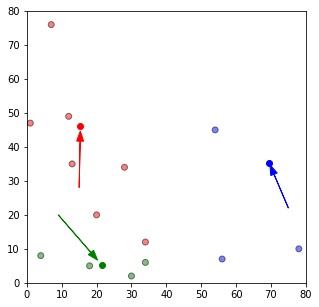

In [26]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx = (centroids[i][0]-old_centroids[i][0])*0.75
    dy = (centroids[i][1]-old_centroids[i][1])*0.75
    # what is head_width, head_length, fc, ec?
    ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=colmap[i], ec=colmap[i])
plt.show()

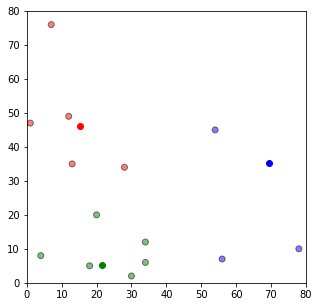

In [27]:
# Repeat Assignement Stage

df = assignment(df, centroids)
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

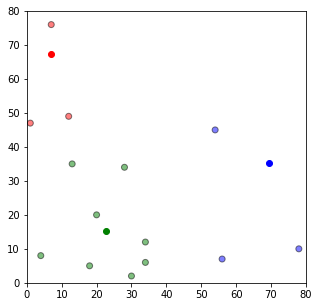

In [28]:
# Continue until all assigned categories don't change anymore
while True:
    closest_centroids = df['closest'].copy(deep=True)
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df['closest']):
        break
        
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
    
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()
    
    

In [31]:
# Use existing algorithm
from sklearn.cluster import KMeans
df=pd.DataFrame({
 'x':[12,20,28,18,30,34,56,78,13,34,54,90,8,1,4,7],
 'y':[49,20,34,5,2,6,7,10,35,12,45,79,97,47,8,76]
})
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [34]:
labels=kmeans.predict(df)
centroids=kmeans.cluster_centers_

In [33]:
labels

array([1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 1, 1, 0, 1], dtype=int32)

In [35]:
centroids

array([[26.33333333, 14.33333333],
       [ 7.        , 67.25      ],
       [74.        , 44.66666667]])

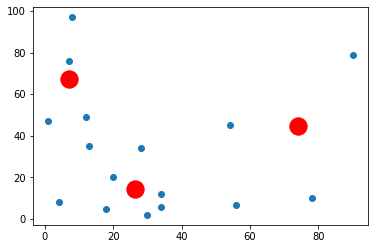

In [37]:
plt.scatter(df['x'], df['y'])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red')
plt.show()